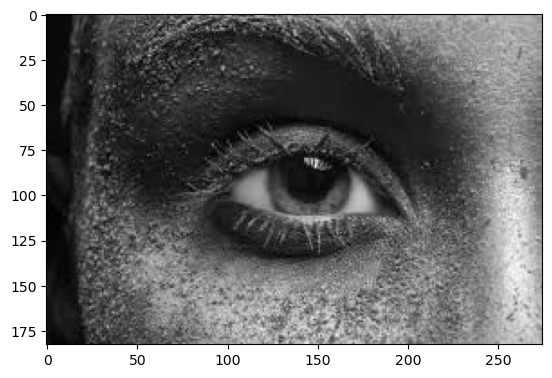

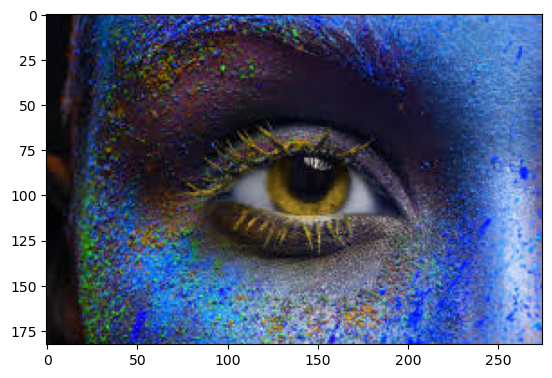

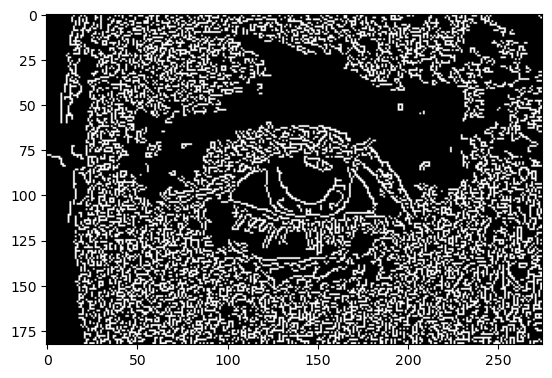

In [2]:
import cv2
import matplotlib.pyplot as plt
image = "C:/Users/User/Desktop/image.jpg"
img = cv2.imread(image, cv2.IMREAD_COLOR)
img_g = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_g,cmap='gray')
plt.show()
img_b = cv2.GaussianBlur(img, (1, 1), 0)
plt.imshow(img_b)
plt.show()
img_ed = cv2.Canny(img_b, 100, 200)
plt.imshow(img_ed, cmap='gray')
plt.show()

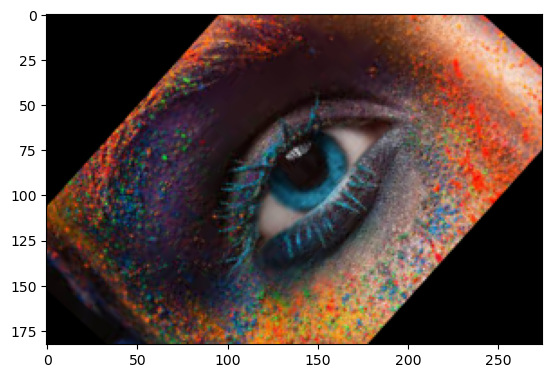

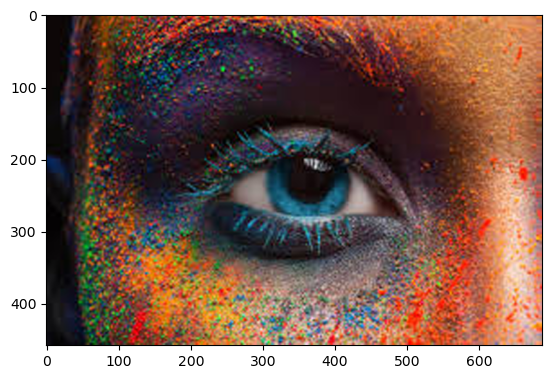

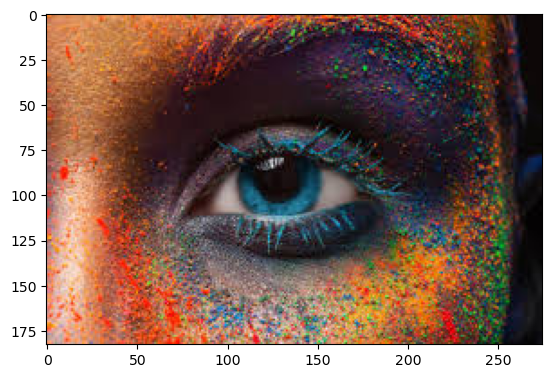

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/User/Desktop/image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(h, w) = img.shape[:2]
matrix = cv2.getRotationMatrix2D((w // 2, h // 2), 48, 1)
rotated = cv2.warpAffine(img, matrix, (w, h))
plt.imshow(rotated)
plt.show()

scaled = cv2.resize(img, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(scaled)
plt.show()

flipped = cv2.flip(img, 1)
plt.imshow(flipped)
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the image data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add the channel dimension (1 for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # First Conv layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer
model.add(layers.Flatten())  # Flatten the data
model.add(layers.Dense(10, activation='softmax'))  # Dense layer with 10 output units for classification

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model for one epoch
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy during Training')
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss during Training')
plt.show()

ImportError: cannot import name 'torch' from partially initialized module 'opt_einsum.backends' (most likely due to a circular import) (c:\Users\User\miniconda3\envs\myenv\lib\site-packages\opt_einsum\backends\__init__.py)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_objects(img_path):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    img = cv2.imread(img_path)
    height, width = img.shape[:2]
# Convert image to blob for YOLO input
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)
    boxes = []
    confidences = []
    class_ids = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        class_name = classes[class_ids[i]]
        confidence = confidences[i]
        label = f"{class_name}: {confidence:.2f}"
        color = (0, 255, 0)

        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        # Label text
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), 1)

    # Convert BGR to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Detected Objects")
    plt.show()

# 🔍 Call the function with the path to your image
detect_objects("C:/Users/User/Desktop/kitchen.jpg")
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_shapes_and_check_inside(image_path):
    img = cv2.imread(image_path)
    output = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                               param1=100, param2=30, minRadius=10, maxRadius=0)

    circle_list = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            circle_list.append((x, y, r))
            cv2.circle(output, (x, y), r, (255, 0, 0), 2)
    contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    triangles = []
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)

        if len(approx) == 3:
            triangle_pts = [tuple(pt[0]) for pt in approx]
            triangles.append(triangle_pts)
            cv2.drawContours(output, [approx], 0, (0, 255, 0), 2)

    # --- Check if triangle is inside any circle ---
    for triangle in triangles:
        for (cx, cy, r) in circle_list:
            all_inside = True
            for (tx, ty) in triangle:
                dist = np.sqrt((tx - cx) ** 2 + (ty - cy) ** 2)
                if dist > r:
                    all_inside = False
                    break

            if all_inside:
                # Mark triangle and circle in red
                cv2.polylines(output, [np.array(triangle)], isClosed=True, color=(0, 0, 255), thickness=3)
                cv2.circle(output, (cx, cy), r, (0, 0, 255), 3)
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(output_rgb)
    plt.axis("off")
    plt.show()

detect_shapes_and_check_inside("C:/Users/User/Desktop/image.jpg")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20241223::readNetFromDarknet'


In [11]:
from ultralytics import YOLO
import cv2
import os

model_path = "yolov8n.pt"
model = YOLO(model_path)
def detect_objects(image_path, model):
    image = cv2.imread(image_path)
    results = model(image)
    
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0].item()
            class_id = int(box.cls[0].item())
            label = f"{model.names[class_id]}: {confidence:.2f}"
            (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_PLAIN, 1, 2)
            cv2.rectangle(image, (x1, y1 - text_height - 5), (x1 + text_width, y1), (0, 255, 0), -1)   
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 2)
    
    cv2.imshow("Detected Objects", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_paths =r"C:\Users\User\Desktop\kitchen.jpg"
detect_objects(image_paths, model)



0: 448x640 1 person, 4 bowls, 7 oranges, 1 potted plant, 1 microwave, 2 ovens, 335.0ms
Speed: 18.5ms preprocess, 335.0ms inference, 27.0ms postprocess per image at shape (1, 3, 448, 640)
